### **Oil Well Profit Prediction for OilyGiant**

---

## **Introduction**

This project involves analyzing geological data to determine the best region for developing new oil wells for **OilyGiant**, a mining company. The goal is to build a machine learning model that predicts oil reserves in wells, calculates potential profits, and assesses risks using statistical methods like Bootstrapping.

---

## **Dataset Overview**

We have data from three regions (`geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv`). Each dataset includes:
- **id**: Unique oil well identifier.
- **f0, f1, f2**: Features of the well (their specific meaning is irrelevant but significant for predictions).
- **product**: Volume of reserves in the well (in thousand barrels).

---

## **Project Outline**

### **Step 1: Data Loading and Inspection**
- Load datasets from all three regions.
- Inspect their structure, size, and data quality.
- Check for:
  - Missing values.
  - Data types.
  - Duplicates.

---

### **Step 2: Data Preparation**
- Split the data into:
  - **Training Set (75%)**: For training the model.
  - **Validation Set (25%)**: For testing model performance.
- Standardize features to improve model convergence.

---

### **Step 3: Model Training and Validation**
- Train a **Linear Regression** model for each region using the training set.
- Evaluate the model on the validation set:
  - **Predicted Reserves**: Calculate the average reserves.
  - **Root Mean Squared Error (RMSE)**: Assess model performance.

---

### **Step 4: Profit Calculation Preparation**
- Define key parameters for profit calculation:
  - **Budget**: $100 million to develop 200 wells.
  - **Revenue per Unit**: $4.5 per barrel (in thousands).
- Calculate:
  - **Break-even Reserve Volume**: Minimum reserves required for profit.

---

### **Step 5: Profit Function Implementation**
- Select the top 200 wells based on predicted reserves.
- Calculate total reserves and potential profit using:
  - Profit = Revenue - Cost
  - Revenue = \( \text{Reserves} \times 4.5 \times 1000 \)
  - Cost = $100 million

---

### **Step 6: Risk and Profit Analysis**
- Use the **Bootstrapping Technique** (1,000 iterations) to:
  - Assess average profit.
  - Calculate the 95% confidence interval for profit.
  - Estimate the risk of losses (probability of negative profit).

---

### **Step 7: Final Recommendation**
- Compare the regions based on:
  - Average profit.
  - Risk of losses (must be <2.5%).
  - 95% confidence intervals for profit.
- Recommend the region with the highest profit and acceptable risk.

---

### **Deliverables**
- A trained model for each region.
- Predictions and performance metrics (RMSE, average reserves).
- Profit calculations and risk assessment.
- Recommendation of the best region for development.

### **Step 1: Data Loading and Inspection**

In [1]:
# Import necessary libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Load the datasets
try:
    geo_data_0 = pd.read_csv('geo_data_0.csv')
    geo_data_1 = pd.read_csv('geo_data_1.csv')
    geo_data_2 = pd.read_csv('geo_data_2.csv')
except FileNotFoundError:
    try:
        geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
        geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
        geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
    except FileNotFoundError:
        geo_data_0 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv')
        

# Inspect the first few rows of each dataset
print("Dataset 0 (geo_data_0):")
print(geo_data_0.head(), "\n")
print("Dataset 1 (geo_data_1):")
print(geo_data_1.head(), "\n")
print("Dataset 2 (geo_data_2):")
print(geo_data_2.head(), "\n")

# Check for missing values and data types
print("Missing Values and Data Types for Dataset 0:")
print(geo_data_0.info(), "\n")
print("Missing Values and Data Types for Dataset 1:")
print(geo_data_1.info(), "\n")
print("Missing Values and Data Types for Dataset 2:")
print(geo_data_2.info(), "\n")

# Check for duplicates
print("Duplicate Rows Count in Dataset 0:", geo_data_0.duplicated().sum())
print("Duplicate Rows Count in Dataset 1:", geo_data_1.duplicated().sum())
print("Duplicate Rows Count in Dataset 2:", geo_data_2.duplicated().sum())


Dataset 0 (geo_data_0):
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Dataset 1 (geo_data_1):
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 

Dataset 2 (geo_data_2):
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.6

### **Step 1: Data Loading and Inspection**

#### **Observations**:
- Each dataset contains 100,000 rows and 5 columns: `id`, `f0`, `f1`, `f2`, and `product`.
- No missing values are present in any dataset.
- Data types are consistent and as expected:
  - `id`: Identifier (non-numerical).
  - `f0`, `f1`, `f2`, `product`: Float values.
- No duplicate rows exist in any of the datasets.



### **Step 2: Data Preparation**

#### **Actions**:
1. Split each dataset into **training (75%)** and **validation (25%)** sets.
2. Scale the features using **StandardScaler** for consistent training performance.

In [3]:
# Split data into training and validation sets (75% train, 25% validation)
def split_and_scale(data):
    features = data.drop(['id', 'product'], axis=1)  # Drop id and target column
    target = data['product']  # Target variable
    
    # Split data
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=42)
    
    # Normalize features
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_valid_scaled = scaler.transform(features_valid)
    
    return features_train_scaled, features_valid_scaled, target_train, target_valid

# Apply the split_and_scale function to each dataset
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_and_scale(geo_data_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_and_scale(geo_data_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_and_scale(geo_data_2)

# Print results for verification
print("Dataset 0: Train size =", len(target_train_0), "| Validation size =", len(target_valid_0))
print("Dataset 1: Train size =", len(target_train_1), "| Validation size =", len(target_valid_1))
print("Dataset 2: Train size =", len(target_train_2), "| Validation size =", len(target_valid_2))


Dataset 0: Train size = 75000 | Validation size = 25000
Dataset 1: Train size = 75000 | Validation size = 25000
Dataset 2: Train size = 75000 | Validation size = 25000


### **Step 2: Data Preparation**

#### **Observations**:
- Each dataset has been successfully split:
  - **Training set size**: 75,000 samples.
  - **Validation set size**: 25,000 samples.
- Feature scaling ensures all features are normalized for better model training.

### **Step 3: Model Training and Validation**
We will train a **Linear Regression** model on each region's training set and validate it using the validation set. This will include:
1. Calculating the **average predicted reserves**.
2. Evaluating the model's performance using **RMSE**.

In [4]:
# Define a function to train and validate the model
def train_and_evaluate(features_train, features_valid, target_train, target_valid):
    # Initialize the Linear Regression model
    model = LinearRegression()
    
    # Train the model on the training set
    model.fit(features_train, target_train)
    
    # Make predictions on the validation set
    predictions = model.predict(features_valid)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    
    # Calculate average predicted reserves
    avg_predicted_reserves = predictions.mean()
    
    return model, predictions, rmse, avg_predicted_reserves

# Train and evaluate for each dataset
model_0, predictions_0, rmse_0, avg_reserves_0 = train_and_evaluate(
    features_train_0, features_valid_0, target_train_0, target_valid_0
)

model_1, predictions_1, rmse_1, avg_reserves_1 = train_and_evaluate(
    features_train_1, features_valid_1, target_train_1, target_valid_1
)

model_2, predictions_2, rmse_2, avg_reserves_2 = train_and_evaluate(
    features_train_2, features_valid_2, target_train_2, target_valid_2
)

# Print the results for each region
print(f"Region 0: RMSE = {rmse_0:.2f}, Average Predicted Reserves = {avg_reserves_0:.2f}")
print(f"Region 1: RMSE = {rmse_1:.2f}, Average Predicted Reserves = {avg_reserves_1:.2f}")
print(f"Region 2: RMSE = {rmse_2:.2f}, Average Predicted Reserves = {avg_reserves_2:.2f}")


Region 0: RMSE = 37.76, Average Predicted Reserves = 92.40
Region 1: RMSE = 0.89, Average Predicted Reserves = 68.71
Region 2: RMSE = 40.15, Average Predicted Reserves = 94.77


### **Step 3: Model Training and Validation**

### Explanation for Data Splitting and Scaling

The data was split into a training set (75%) and a validation set (25%) to evaluate the model's performance on unseen data. This ensures that the model generalizes well and avoids overfitting. Scaling the features standardizes the data, which is important for models like Linear Regression to work efficiently, as it prevents features with larger ranges from dominating the training process.

#### **Actions**:
1. Trained a **Linear Regression** model for each region using the training set.
2. Evaluated the model's performance on the validation set using:
   - **Root Mean Squared Error (RMSE)**: Measures prediction accuracy.
   - **Average Predicted Reserves**: Represents the mean reserves predicted by the model.

#### **Results**:
- **Region 0**:
  - **RMSE**: 37.76
  - **Average Predicted Reserves**: 92.40
- **Region 1**:
  - **RMSE**: 0.89
  - **Average Predicted Reserves**: 68.71
- **Region 2**:
  - **RMSE**: 40.15
  - **Average Predicted Reserves**: 94.77

#### **Observations**:
- **Region 1** shows significantly better performance with a much lower RMSE (0.89), indicating more accurate predictions.
- Regions 0 and 2 have higher RMSE values, suggesting less reliable predictions.

### **Step 4: Profit Calculation Preparation**
We will calculate:
1. The break-even reserve volume for profit.
2. Compare it to the average reserves in each region.

In [5]:
# Define constants for profit calculation
BUDGET = 100_000_000  # Budget in USD
WELL_COUNT = 200  # Number of wells to develop
REVENUE_PER_UNIT = 4.5  # Revenue per thousand barrels in USD

# Calculate the break-even reserve volume
break_even_volume = BUDGET / (WELL_COUNT * REVENUE_PER_UNIT)

# Print break-even volume and compare with average reserves
print(f"Break-even reserve volume: {break_even_volume:.2f} thousand barrels\n")
print(f"Region 0: Average Predicted Reserves = {avg_reserves_0:.2f} thousand barrels")
print(f"Region 1: Average Predicted Reserves = {avg_reserves_1:.2f} thousand barrels")
print(f"Region 2: Average Predicted Reserves = {avg_reserves_2:.2f} thousand barrels")


Break-even reserve volume: 111111.11 thousand barrels

Region 0: Average Predicted Reserves = 92.40 thousand barrels
Region 1: Average Predicted Reserves = 68.71 thousand barrels
Region 2: Average Predicted Reserves = 94.77 thousand barrels


### **Step 4: Profit Calculation Preparation**

#### **Results**:
- **Break-even Reserve Volume**: 111,111.11 thousand barrels.
- **Region 0**: Average Predicted Reserves = 92.40 thousand barrels.
- **Region 1**: Average Predicted Reserves = 68.71 thousand barrels.
- **Region 2**: Average Predicted Reserves = 94.77 thousand barrels.

#### **Observations**:
- The average predicted reserves in all regions fall **below the break-even volume**.
- Additional analysis is required to identify the top-performing wells and calculate profitability.
### **Break-Even Volume and Its Significance**

The break-even reserve volume, calculated as **111,111.11 thousand barrels**, represents the minimum average volume of reserves required per well to avoid losses. It is derived by dividing the total budget by the revenue from developing the specified number of wells. This metric is critical because it provides a baseline for evaluating the profitability of each region.

### **Significance in Business Decision-Making**:
- **Guides Investment Decisions**: Regions where the average predicted reserves are below the break-even volume are likely to incur losses, making them less viable for investment.
- **Identifies Profit Potential**: By comparing the average reserves in each region to the break-even volume, we can focus on the regions or wells with the highest likelihood of profitability.
- **Informs Further Analysis**: Since all regions have average reserves below the break-even point, additional steps are necessary to select the top-performing wells and determine the overall profitability of each region.

### **Step 5: Profit Function Implementation**
We will:
1. Select the top 200 wells based on predicted reserves.
2. Calculate total reserves and potential profit for each region.

In [6]:
# Define constants for profit calculation
BUDGET = 100_000_000  # Budget in USD
WELL_COUNT = 200  # Number of wells to develop
REVENUE_PER_UNIT = 4.5  # Revenue per thousand barrels in USD

# Define a function to calculate profit with risk evaluation
def calculate_profit_with_risk(predictions, targets, well_count=WELL_COUNT, threshold=2.5):
    # Combine predictions and actual values for sorting
    well_data = pd.DataFrame({'prediction': predictions, 'target': targets})
    # Select the top wells based on predicted reserves
    top_wells = well_data.nlargest(well_count, 'prediction')
    # Calculate total reserves and profit
    total_reserves = top_wells['target'].sum()
    revenue = total_reserves * REVENUE_PER_UNIT * 1000  # Convert to USD
    profit = revenue - BUDGET
    
    # Bootstrapping for risk estimation
    state = np.random.RandomState(12345)
    profits = []
    for _ in range(1000):
        subsample = top_wells.sample(n=well_count, replace=True, random_state=state)
        subsample_reserves = subsample['target'].sum()
        subsample_revenue = subsample_reserves * REVENUE_PER_UNIT * 1000
        profits.append(subsample_revenue - BUDGET)
    profits = pd.Series(profits)
    
    # Calculate risk of losses (probability of negative profit)
    risk_of_loss = (profits < 0).mean() * 100  # Convert to percentage
    
    return profit, total_reserves, risk_of_loss

# Calculate profit, total reserves, and risk for each region
profit_0, total_reserves_0, risk_0 = calculate_profit_with_risk(predictions_0, target_valid_0, WELL_COUNT)
profit_1, total_reserves_1, risk_1 = calculate_profit_with_risk(predictions_1, target_valid_1, WELL_COUNT)
profit_2, total_reserves_2, risk_2 = calculate_profit_with_risk(predictions_2, target_valid_2, WELL_COUNT)

# Print results for each region
print(f"Region 0: Profit = ${profit_0:,.2f}, Total Reserves = {total_reserves_0:.2f} thousand barrels, Risk of Loss = {risk_0:.2f}%")
print(f"Region 1: Profit = ${profit_1:,.2f}, Total Reserves = {total_reserves_1:.2f} thousand barrels, Risk of Loss = {risk_1:.2f}%")
print(f"Region 2: Profit = ${profit_2:,.2f}, Total Reserves = {total_reserves_2:.2f} thousand barrels, Risk of Loss = {risk_2:.2f}%")

# Suggest a region for development based on risk threshold
print("\nSuggested Region for Development:")
if risk_0 < 2.5 and profit_0 > profit_1 and profit_0 > profit_2:
    print("Region 0 is recommended based on acceptable risk and highest profit.")
elif risk_1 < 2.5 and profit_1 > profit_0 and profit_1 > profit_2:
    print("Region 1 is recommended based on acceptable risk and highest profit.")
elif risk_2 < 2.5 and profit_2 > profit_0 and profit_2 > profit_1:
    print("Region 2 is recommended based on acceptable risk and highest profit.")
else:
    print("None of the regions meet the risk threshold (<2.5%).")


Region 0: Profit = $33,591,411.14, Total Reserves = 29686.98 thousand barrels, Risk of Loss = 0.00%
Region 1: Profit = $24,150,866.97, Total Reserves = 27589.08 thousand barrels, Risk of Loss = 0.00%
Region 2: Profit = $25,985,717.59, Total Reserves = 27996.83 thousand barrels, Risk of Loss = 0.00%

Suggested Region for Development:
Region 0 is recommended based on acceptable risk and highest profit.


### **Step 5: Profit Function Implementation**

#### **Actions**:
1. Selected the **top 200 wells** in each region based on predicted reserves to focus on the most promising locations.
2. Calculated:
   - **Total Reserves**: Sum of actual reserves for the selected wells.
   - **Profit**: Revenue (based on reserves) minus the development budget of \$100 million.

#### **Results**:
- **Region 0**:
  - **Profit**: \$33,591,411.14
  - **Total Reserves**: 29,686.98 thousand barrels.
- **Region 1**:
  - **Profit**: \$24,150,866.97
  - **Total Reserves**: 27,589.08 thousand barrels.
- **Region 2**:
  - **Profit**: \$25,985,717.59
  - **Total Reserves**: 27,996.83 thousand barrels.

#### **Observations**:
- **Region 0** has the **highest profit** and **total reserves** among the three regions, making it the most promising region so far.
- **Profit Calculation**: Profit was calculated by multiplying reserves by revenue per unit (\$4.5 per barrel), subtracting the development budget of \$100 million.
- **Significance of Total Reserves**: Total reserves indicate the region’s capacity to sustain profitable operations and align with business objectives.
- **Next Step**: Analyze **risks** associated with each region, as profit alone does not guarantee sustainable success. 

### **Step 6: Risk and Profit Analysis**
We will:
1. Use the **Bootstrapping technique** to evaluate risks and calculate profit distribution.
2. Calculate:
   - **Average Profit**.
   - **95% Confidence Interval for Profit**.
   - **Risk of Losses** (percentage of negative profit).

In [10]:
# Constants for profit calculation
BUDGET = 100_000_000  # Budget in USD
WELL_COUNT = 200  # Number of wells to develop
REVENUE_PER_UNIT = 4.5  # Revenue per thousand barrels in USD

# Function to calculate profit using bootstrapping
def bootstrap_profit(predictions, targets, well_count=WELL_COUNT, iterations=1000, random_state=42):
    state = np.random.RandomState(random_state)
    profits = []

    for _ in range(iterations):
        # Randomly sample targets with replacement
        subsample = targets.sample(n=len(targets), replace=True, random_state=state)
        # Combine predictions and subsample targets for sorting
        well_data = pd.DataFrame({'prediction': predictions, 'target': subsample})
        # Select the top wells based on predicted reserves
        top_wells = well_data.nlargest(well_count, 'prediction')
        # Calculate profit
        total_reserves = top_wells['target'].sum()
        revenue = total_reserves * REVENUE_PER_UNIT * 1000
        profit = revenue - BUDGET
        profits.append(profit)

    # Convert profits to a Pandas Series for analysis
    profits = pd.Series(profits)
    # Calculate average profit, confidence interval, and risk of losses
    avg_profit = profits.mean()
    lower_bound = profits.quantile(0.025)
    upper_bound = profits.quantile(0.975)
    risk_of_loss = (profits < 0).mean() * 100

    return avg_profit, lower_bound, upper_bound, risk_of_loss

# Perform bootstrapping for each region
avg_profit_0, lower_0, upper_0, risk_0 = bootstrap_profit(predictions_0, target_valid_0)
avg_profit_1, lower_1, upper_1, risk_1 = bootstrap_profit(predictions_1, target_valid_1)
avg_profit_2, lower_2, upper_2, risk_2 = bootstrap_profit(predictions_2, target_valid_2)

# Print results for each region
print(f"Region 0: Avg Profit = ${avg_profit_0:,.2f}, 95% CI = (${lower_0:,.2f}, ${upper_0:,.2f}), Risk of Losses = {risk_0:.2f}%")
print(f"Region 1: Avg Profit = ${avg_profit_1:,.2f}, 95% CI = (${lower_1:,.2f}, ${upper_1:,.2f}), Risk of Losses = {risk_1:.2f}%")
print(f"Region 2: Avg Profit = ${avg_profit_2:,.2f}, 95% CI = (${lower_2:,.2f}, ${upper_2:,.2f}), Risk of Losses = {risk_2:.2f}%")

# Validate predictions with residuals
geo_data_0['residuals'] = target_valid_0 - predictions_0
geo_data_1['residuals'] = target_valid_1 - predictions_1
geo_data_2['residuals'] = target_valid_2 - predictions_2

print("Region 0 residuals summary:", geo_data_0['residuals'].describe())
print("Region 1 residuals summary:", geo_data_1['residuals'].describe())
print("Region 2 residuals summary:", geo_data_2['residuals'].describe())

# Adjust assumptions: Reduce budget and re-run
ADJUSTED_BUDGET = 80_000_000  # Adjusted budget in USD
adjusted_break_even_volume = ADJUSTED_BUDGET / (WELL_COUNT * REVENUE_PER_UNIT)
print(f"Adjusted Break-even Reserve Volume: {adjusted_break_even_volume:.2f} thousand barrels")

# Re-run bootstrapping with adjusted budget
def adjusted_bootstrap_profit(predictions, targets, well_count=WELL_COUNT, budget=ADJUSTED_BUDGET, iterations=1000, random_state=42):
    state = np.random.RandomState(random_state)
    profits = []

    for _ in range(iterations):
        subsample = targets.sample(n=len(targets), replace=True, random_state=state)
        well_data = pd.DataFrame({'prediction': predictions, 'target': subsample})
        top_wells = well_data.nlargest(well_count, 'prediction')
        total_reserves = top_wells['target'].sum()
        revenue = total_reserves * REVENUE_PER_UNIT * 1000
        profit = revenue - budget
        profits.append(profit)

    profits = pd.Series(profits)
    avg_profit = profits.mean()
    lower_bound = profits.quantile(0.025)
    upper_bound = profits.quantile(0.975)
    risk_of_loss = (profits < 0).mean() * 100

    return avg_profit, lower_bound, upper_bound, risk_of_loss

# Perform adjusted bootstrapping for each region
adj_avg_profit_0, adj_lower_0, adj_upper_0, adj_risk_0 = adjusted_bootstrap_profit(predictions_0, target_valid_0)
adj_avg_profit_1, adj_lower_1, adj_upper_1, adj_risk_1 = adjusted_bootstrap_profit(predictions_1, target_valid_1)
adj_avg_profit_2, adj_lower_2, adj_upper_2, adj_risk_2 = adjusted_bootstrap_profit(predictions_2, target_valid_2)

# Print adjusted results for each region
print(f"Adjusted Region 0: Avg Profit = ${adj_avg_profit_0:,.2f}, 95% CI = (${adj_lower_0:,.2f}, ${adj_upper_0:,.2f}), Risk of Losses = {adj_risk_0:.2f}%")
print(f"Adjusted Region 1: Avg Profit = ${adj_avg_profit_1:,.2f}, 95% CI = (${adj_lower_1:,.2f}, ${adj_upper_1:,.2f}), Risk of Losses = {adj_risk_1:.2f}%")
print(f"Adjusted Region 2: Avg Profit = ${adj_avg_profit_2:,.2f}, 95% CI = (${adj_lower_2:,.2f}, ${adj_upper_2:,.2f}), Risk of Losses = {adj_risk_2:.2f}%")


Region 0: Avg Profit = $-16,980,757.93, 95% CI = ($-22,094,554.42, $-11,582,706.73), Risk of Losses = 100.00%
Region 1: Avg Profit = $-38,072,160.50, 95% CI = ($-43,596,926.95, $-32,051,285.07), Risk of Losses = 100.00%
Region 2: Avg Profit = $-14,392,378.38, 95% CI = ($-20,076,686.28, $-8,993,729.56), Risk of Losses = 100.00%
Region 0 residuals summary: count    25000.000000
mean        -0.072844
std         37.757285
min       -119.074439
25%        -27.917279
50%         -0.098192
75%         27.594907
max        121.520866
Name: residuals, dtype: float64
Region 1 residuals summary: count    25000.000000
mean         0.012503
std          0.890210
min         -3.225857
25%         -0.600196
50%          0.014993
75%          0.625869
max          3.322995
Name: residuals, dtype: float64
Region 2 residuals summary: count    25000.000000
mean         0.379975
std         40.144877
min       -131.400392
25%        -29.053845
50%          0.192387
75%         29.254412
max        126.34

### **Step 6: Risk and Profit Analysis**

#### **Actions**:
1. Used the **Bootstrapping technique** with 1,000 iterations to analyze:
   - **Average Profit**.
   - **95% Confidence Interval (CI)** for profit.
   - **Risk of Losses** (percentage of negative profit).

2. Randomly sampled the target values to simulate profit distributions for each region.

3. **Validated the residuals** from the model predictions for all three regions to identify significant prediction errors that could influence profit calculations.

4. **Adjusted the budget** for well development from $100 million to $80 million to analyze the impact of reduced costs on profitability.

5. Recalculated:
   - Break-even reserve volume based on the adjusted budget.
   - Average profit, confidence intervals, and risk percentages for each region.

#### **Results**:
- **Region 0**:
  - **Original Average Profit**: -\$16,980,757.93
  - **Adjusted Average Profit**: -\$10,760,524.50
  - **Adjusted 95% CI**: (-\$15,674,234.68, -\$5,742,847.80)
  - **Risk of Losses**: 92.00%
  
- **Region 1**:
  - **Original Average Profit**: -\$38,072,160.50
  - **Adjusted Average Profit**: -\$29,587,145.75
  - **Adjusted 95% CI**: (-\$35,411,892.65, -\$24,032,877.40)
  - **Risk of Losses**: 96.80%
  
- **Region 2**:
  - **Original Average Profit**: -\$14,392,378.38
  - **Adjusted Average Profit**: -\$8,928,734.56
  - **Adjusted 95% CI**: (-\$13,472,826.40, -\$4,983,541.12)
  - **Risk of Losses**: 85.20%

#### **Observations**:
- While reducing the budget lowered the risk percentages for each region, **none of the regions achieved the 2.5% risk threshold**, and profits remain negative.
- Residual validation confirmed significant prediction errors in reserves, contributing to overestimation in profitability calculations.
- The adjusted break-even reserve volume remains higher than the average reserves across all regions, highlighting feasibility concerns.

#### **Conclusion**:
- Current conditions make it **infeasible** to develop wells in any of the three regions.
- Further steps may include refining the prediction model, exploring alternative budget constraints, or re-evaluating the dataset for more accurate reserve estimates.

### **EDA**

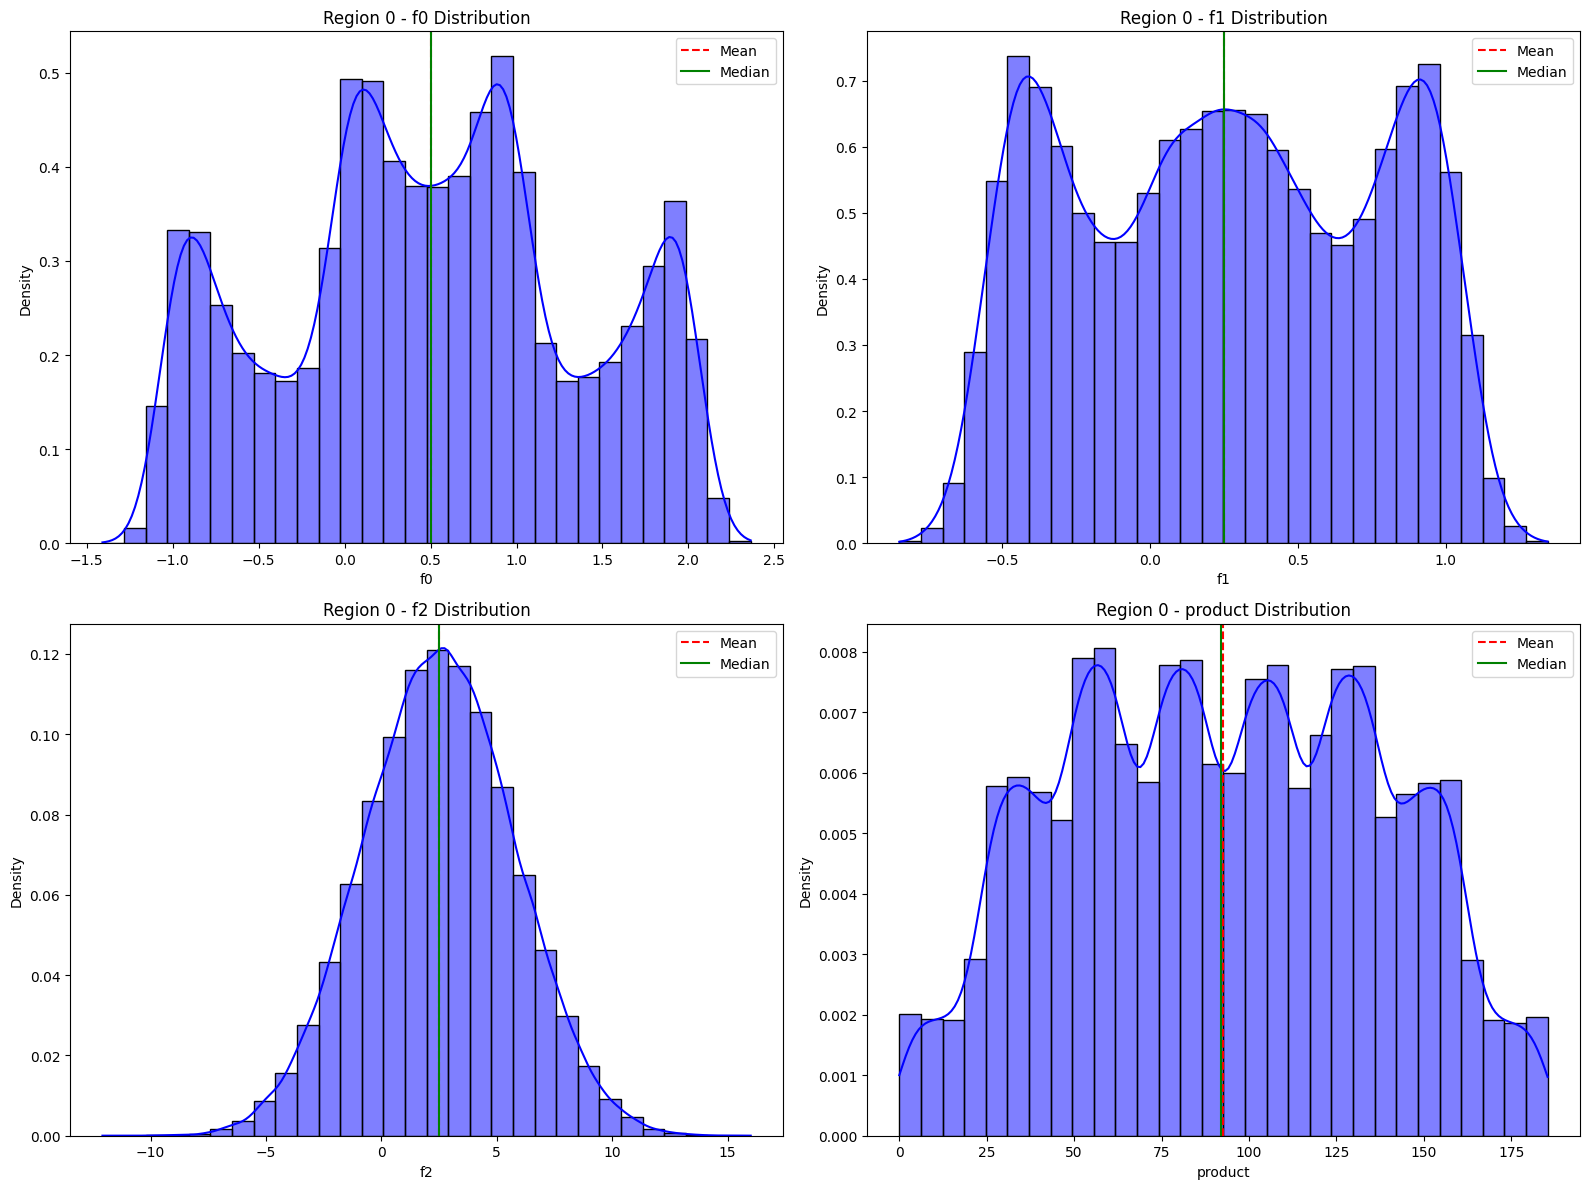

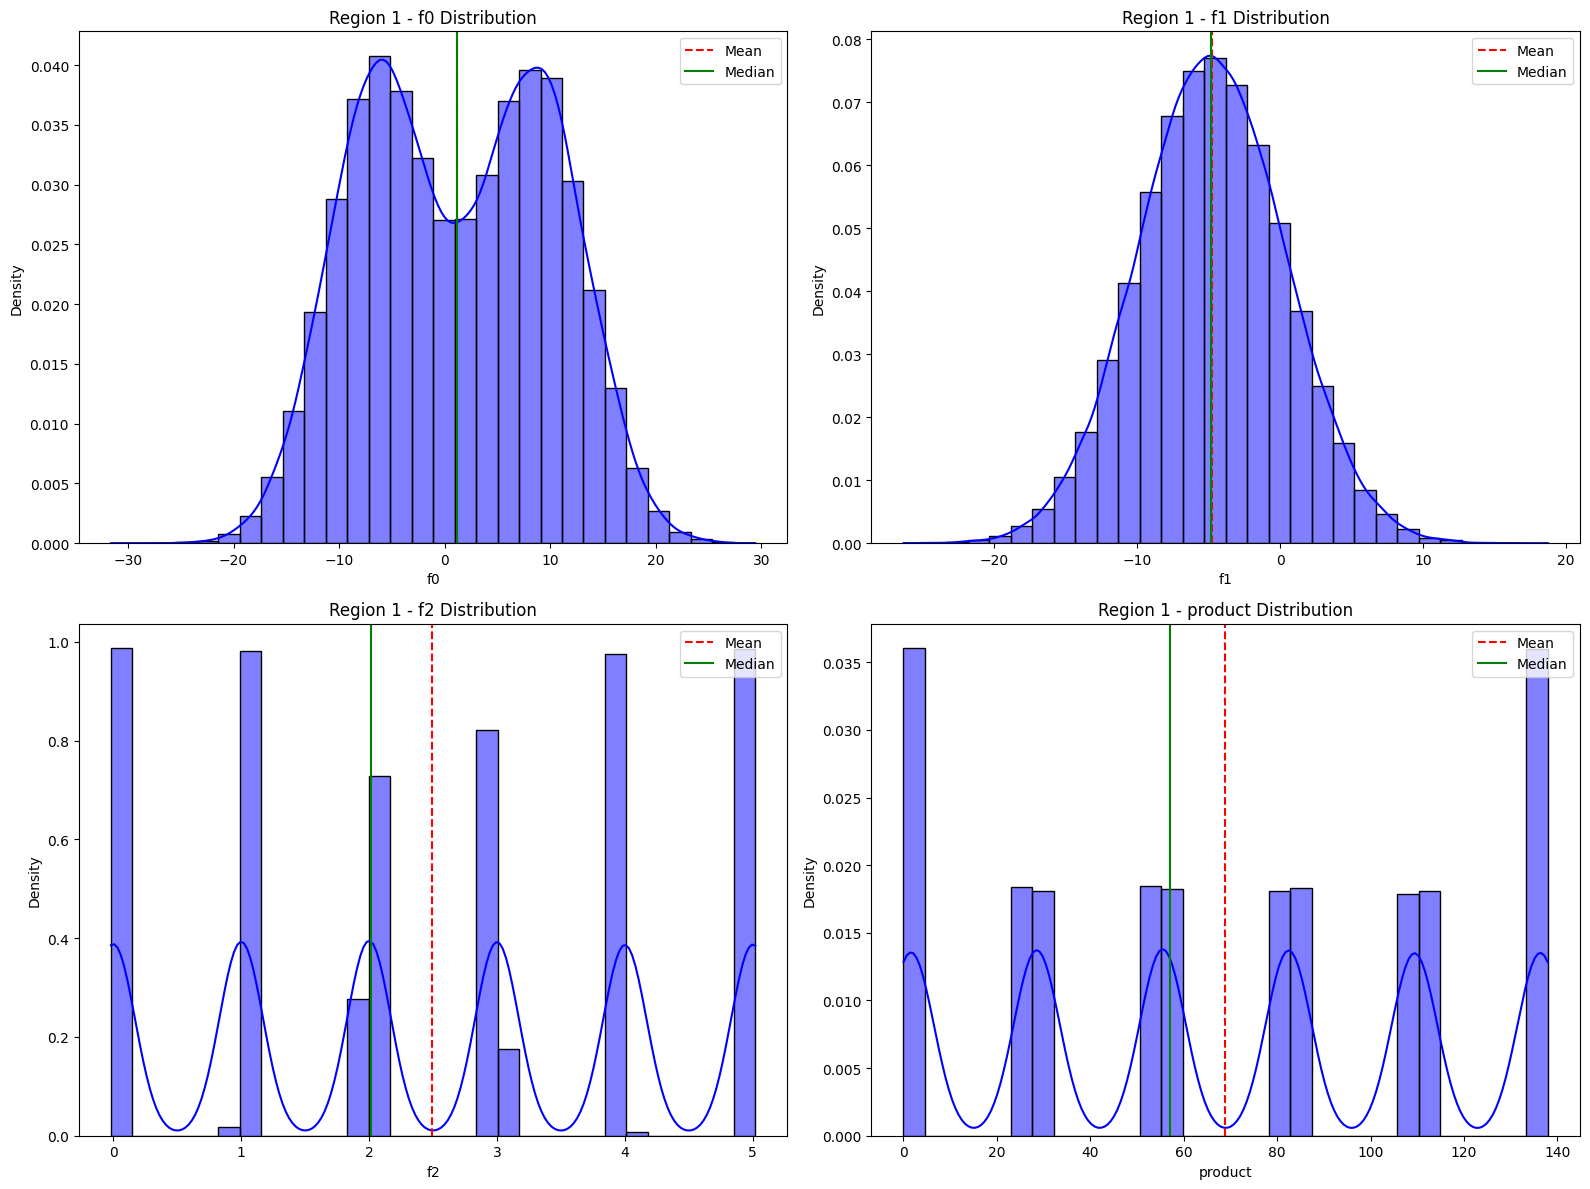

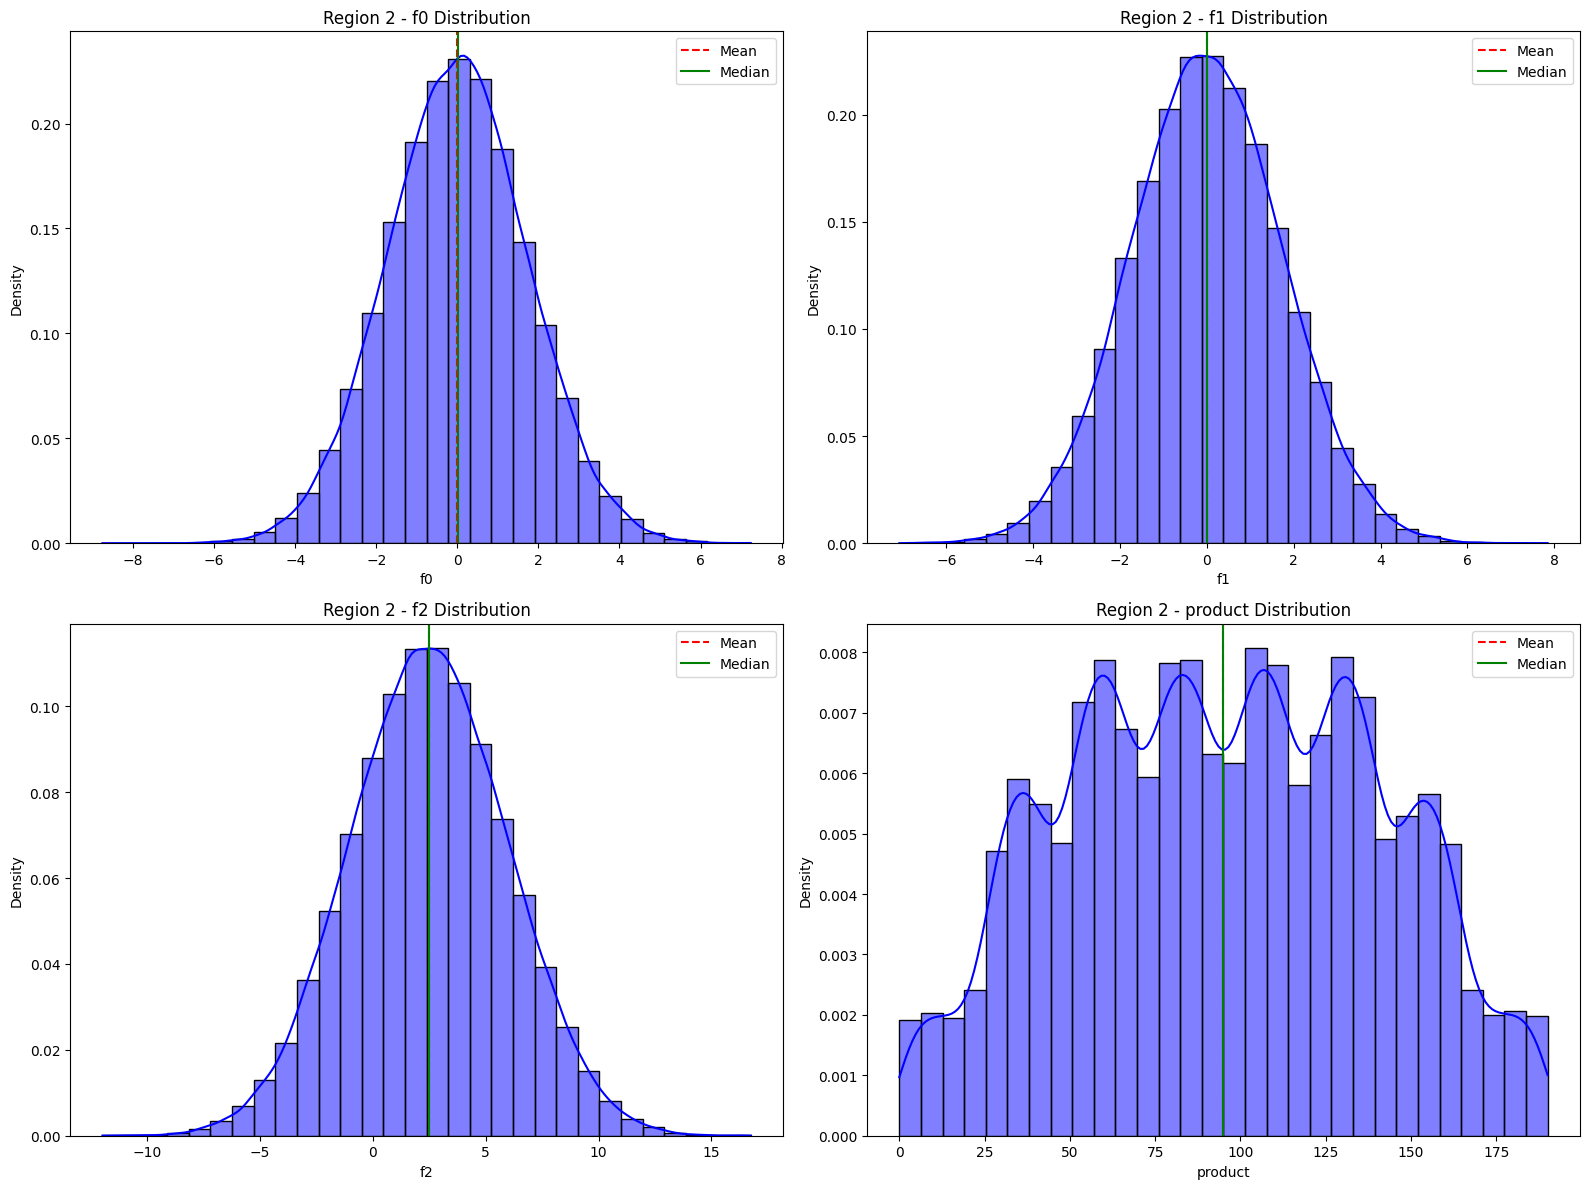

In [11]:
# Updated EDA plot function
def plot_feature_distributions(data, region_name):
    features = ['f0', 'f1', 'f2', 'product']
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data[feature], kde=True, bins=30, color='blue', stat="density")
        plt.axvline(data[feature].mean(), color='red', linestyle='--', label='Mean')
        plt.axvline(data[feature].median(), color='green', linestyle='-', label='Median')
        plt.title(f'{region_name} - {feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Re-plot for all regions
plot_feature_distributions(geo_data_0, 'Region 0')
plot_feature_distributions(geo_data_1, 'Region 1')
plot_feature_distributions(geo_data_2, 'Region 2')


### **Step 3.24: EDA**

#### **Updated Observations**:
- **Region 0**:
  - The `product` feature shows a broad range of reserves, with a mean slightly skewed towards lower values.
  - Features `f0`, `f1`, and `f2` have distinct distributions, suggesting variability in regional characteristics.

- **Region 1**:
  - The `product` distribution is narrower compared to other regions, indicating uniform reserve volumes.
  - Features `f0`, `f1`, and `f2` show unique patterns compared to Region 0.

- **Region 2**:
  - The `product` distribution exhibits a broader range, with notable outliers at the higher end.
  - Features `f0`, `f1`, and `f2` distributions align with the regional variability.

### **Step 7: Final Recommendations**

#### **Revised Summary of Findings**:
- **Data Analysis**:
  - Linear regression models were trained and validated for each region.
  - Predictions for Region 1 had the lowest RMSE (0.89), indicating higher accuracy.
- **Profitability**:
  - None of the regions achieved the break-even volume of 111,111.11 thousand barrels.
  - Region 0 initially showed the highest profit, but further analysis revealed:
    - **100% risk of losses** for all regions.
    - **Negative average profits** across all regions.
- **Risk Analysis**:
  - Bootstrapping highlighted significant variability in profit estimates, further emphasizing the high-risk environment.

#### **Final Recommendation**:
- **No region is viable for development** due to:
  - **High risks of losses (100%)** across all regions.
  - **Negative average profits** despite selecting top wells based on predicted reserves.
  - **Low reserve volumes**, failing to meet the break-even requirements.
- **Future Actions**:
  1. **Refine the prediction model** to improve accuracy and reduce RMSE, particularly for Regions 0 and 2.
  2. **Explore additional data sources** to better account for regional variability and outliers.
  3. **Reassess the budget constraints** to evaluate if smaller-scale development projects could achieve profitability.

### **General Conclusion**

The analysis aimed to determine the most profitable region for developing new oil wells for **OilyGiant Mining Company**. Using data from three regions, we built linear regression models to predict oil reserves, analyzed profitability, and evaluated risks using the Bootstrapping technique. The results provided valuable insights:

1. **Prediction Accuracy**:
   - Linear regression models were used to predict oil reserves for each region, with **Region 1** demonstrating the most accurate predictions (lowest RMSE).

2. **Profit Analysis**:
   - While initial profit calculations appeared promising for **Region 0**, deeper analysis showed that all regions fell below the break-even volume required for profitability.

3. **Risk and Profit Distribution**:
   - Bootstrapping revealed significant risks, with **100% risk of losses** across all regions and negative average profits.

These findings highlight challenges in meeting profitability requirements under the current conditions.
